### Performing Exploratory Data Analysis on insurance.csv file from Kaggle
link to file :
https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv

#### Importing the necessary Libraries

In [ ]:
import pandas as pd              
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlretrieve
# this line ensures that all the charts are in the jupyter notbook as 
#output and not as a pop-up
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x117faf41790>)

In [6]:
#Reading the data and Creating a DataFrame
medical_df = pd.read_csv('medical.csv')
# type(medical_df)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#visualizing the age using histogram
fig = px.histogram(medical_df, 
                   x='age',
                   marginal='box',
                   nbins = 47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()
#almost a uniform distribution except for age 18 and 19

In [8]:
fig = px.histogram(medical_df, 
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()
#Looks like normal distribution

In [9]:
fig = px.histogram(medical_df, 
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df, 
                   x='region',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Count by region and sex')
fig.update_layout(bargap=0.5)
fig.show()

In [12]:
medical_df.smoker.value_counts()
#The data distribution is not equal. Majority (i.e. 80%) belongs to "No" Class

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')
#Distribution of number of smokers by sex is alomost equal

In [15]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

In [17]:
px.scatter(medical_df, x='children', y='charges' )

In [18]:
px.violin(medical_df, x='children', y='charges' )

##### Finding correlation between the features (Charges vs. Other)

In [20]:
print(medical_df.charges.corr(medical_df.age))
print(medical_df.charges.corr(medical_df.bmi))
print(medical_df.charges.corr(medical_df.children))
# No strong correlation between any of the combinations of features

0.2990081933306478
0.19834096883362887
0.06799822684790487


In [22]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric.head()
# Mapping '0' to 'no' class and '1' to class in Smoker Values 

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [23]:
print(medical_df.charges.corr(smoker_numeric))
#here we can find a strong positive correlation betweem charges and smokers

0.7872514304984778


In [24]:
#Mapping Gender Values : 1 for Male and 0 for Female
map_gender = {'male' : 1,
              'female' : 0}
gen_numerical = pd.DataFrame(medical_df['sex'].map(map_gender))
print(gen_numerical)
medical_df.drop(['sex'], inplace=True,axis=1)
medical_df = pd.concat([medical_df,gen_numerical], axis=1)

      sex
0       0
1       1
2       1
3       1
4       1
...   ...
1333    1
1334    0
1335    0
1336    0
1337    0

[1338 rows x 1 columns]


In [25]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges,sex
age,1.000000,0.109272,0.042469,0.299008,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.057292
sex,-0.020856,0.046371,0.017163,0.057292,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

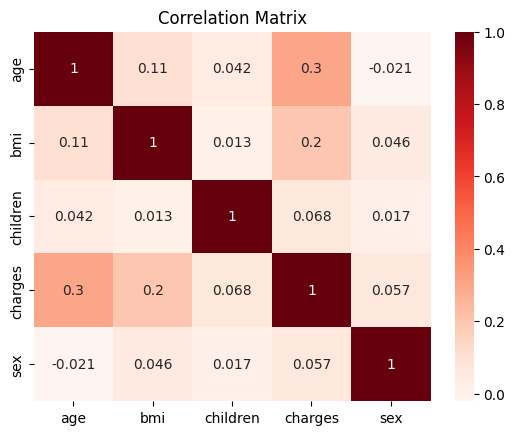

In [26]:
sns.heatmap(medical_df.corr(numeric_only=True),cmap='Reds', annot=True)
plt.title('Correlation Matrix')